In [1]:
# from google.colab import drive
# drive.mount('/drive')

In [2]:
# words = ['fire','nose','water','tongue','blood','bone','rain','name','louse','sweet','fly','night','ear','house','bitter','salt','knee','new','old','thick','long']
# # cr loanwords = ['chanson','auteur','a la mode','académie','après','bourgeois','burlesque','depanneur','detente','ennui','faux pas','fete','fin de siecle','gite','jongleur','lycee','peloton','proletariat','rendezvous']
# # fr-en loanwords = ['beige','brochure','cafe','camaraderie','cliche','clique','concierge','coup','detour','elite','ensemble','etiquette','facade','fine','foyer','naive','nuance','physique','rapport','reservoir']
# # literal translations = ['academy','after','author','boredom','cottage','end of century','fashionable','high school','misstep','mockery','pack','party','relaxation','repairman','room','song','minstrel','working class','meeting','middle class']
# # non-borrowed words = ['fire','nose','water','tongue','blood','bone','rain','name','louse','sweet','fly','night','ear','house','bitter','salt','knee','new','old','thick','long']
# alternative_spellings = {'a la mode':'à la mode','académie':'academie','après':'apres','depanneur':'dépanneur','detente':'détente','faux pas':'faux-pas','fete':'fête','fin de siecle':'findesiecle','gite':'gîte','lycee':'lycée','rendezvous':'rendez vous','cafe':'café','cliche':'cliché','elite':'élite','etiquette':'étiquette','facade':'façade','naive':'naïve','end of century':'end-of-century','middle-class':'middle class'}
# language = 'en'

In [3]:
language = 'en'
model_name = 'bert-base-uncased'
layer = '12'

In [4]:
import pandas as pd
cluster_data = pd.read_csv('Results/Other_Results/'+language+'_'+model_name+'_'+layer+'.csv',header=None)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [5]:
cluster_data.set_axis(['word', 'silhouette_scores', 'wcss', 'distances', 'std_dev', 'av'],
                    axis=1,inplace=True)

/var/folders/f7/dcrb96gs3q7917hmz1pbdqf80000gn/T/ipykernel_39455/627395537.py:1: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  cluster_data.set_axis(['word', 'silhouette_scores', 'wcss', 'distances', 'std_dev', 'av'],


In [6]:
cluster_data.head()

,word,silhouette_scores,wcss,distances,std_dev,av
0,a la mode,"[0.524215, 0.4504565, 0.4082457, 0.3666234, 0....","[1835.8433837890625, 1120.29345703125, 871.091...",[0.06357478 0.31891121 0.12652461 ... 0.291371...,0.098081,0.275769
1,académie,"[0.4705351, 0.5208348, 0.34995082, 0.40854815,...","[8041.9228515625, 4177.00244140625, 3293.60302...",[0.46184626 0.38547405 0.39791736 ... 0.260127...,0.158062,0.482523
2,après,"[0.4263891, 0.42379707, 0.41517845, 0.41380835...","[8751.248046875, 5430.0087890625, 3856.4289550...",[0.13679599 0.29020915 0.28252553 ... 0.386514...,0.129894,0.385410
3,bourgeois,"[0.3737407, 0.43407428, 0.44689384, 0.42017236...","[4669.0048828125, 2742.1484375, 2034.206542968...",[0.37536592 0.47460833 0.38059381 ... 0.178746...,0.103016,0.318681
4,burlesque,"[0.62198436, 0.60505956, 0.47633687, 0.4648942...","[3760.4873046875, 1520.3076171875, 1000.818054...",[0.21991261 0.26370393 0.23133457 ... 0.162275...,0.135425,0.234254


In [8]:
import csv

file_name = 'Results/MLM_Results/masked_word_'+model_name+'_'+language+'_v3.csv'

results_dict = {'word':[],'word type': []}

with open(file_name,'r') as MASK: # taking MRR data to get word types
  maskreader = csv.reader(MASK)
  next(maskreader)
  for row in maskreader:
    results_dict['word'].append(row[0])
    results_dict['word type'].append(row[1])

resultsdf = pd.DataFrame(results_dict)

In [9]:
cluster_wtypes = cluster_data.merge(resultsdf,on= 'word',how = 'left')

In [10]:
cluster_wtypes.drop(columns = ['silhouette_scores','wcss','distances'],inplace=True)

In [11]:
cluster_wtypes.head()

,word,std_dev,av,word type
0,a la mode,0.098081,0.275769,cr loanword
1,académie,0.158062,0.482523,cr loanword
2,après,0.129894,0.385410,cr loanword
3,bourgeois,0.103016,0.318681,cr loanword
4,burlesque,0.135425,0.234254,cr loanword


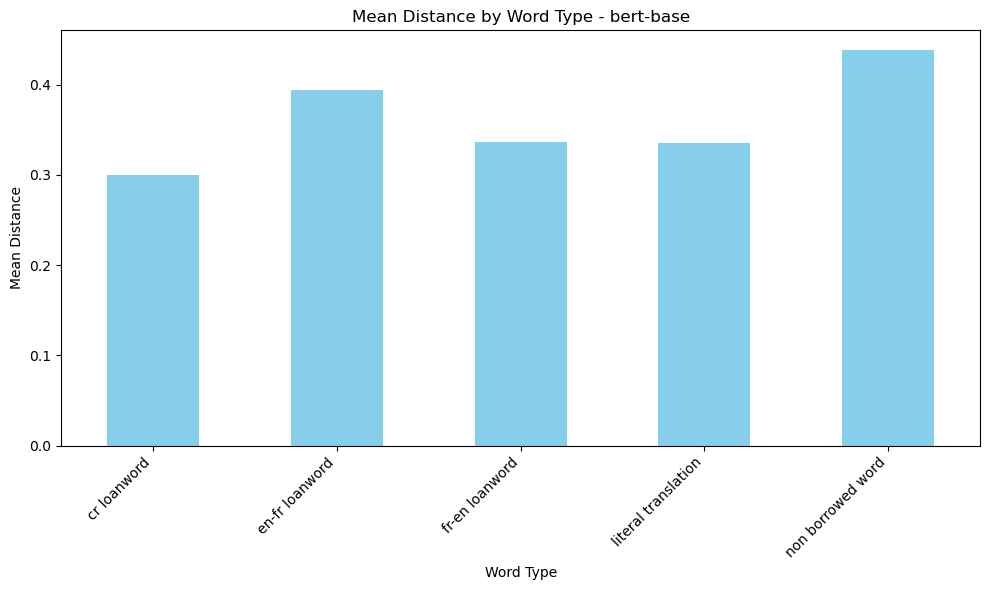

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the mean of each word type
mean_by_word_type = cluster_wtypes.groupby('word type')['av'].mean()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
mean_by_word_type.plot(kind='bar', color='skyblue')
plt.title('Mean Distance by Word Type - bert-base')
plt.xlabel('Word Type')
plt.ylabel('Mean Distance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

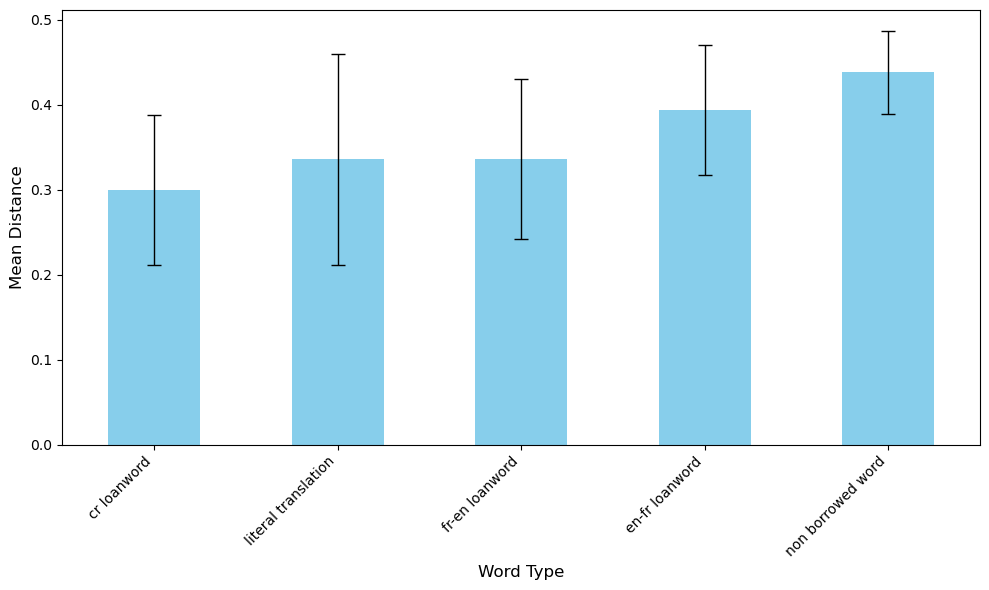

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the mean and standard deviation of each word type
mean_by_word_type = cluster_wtypes.groupby('word type')['av'].mean()
std_by_word_type = cluster_wtypes.groupby('word type')['av'].std()

# Sort the mean_by_word_type Series in ascending order by values
mean_by_word_type_sorted = mean_by_word_type.sort_values()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
mean_by_word_type_sorted.plot(kind='bar', color='skyblue', yerr=std_by_word_type, capsize=5, error_kw={'elinewidth': 1, 'ecolor': 'black'})
plt.xlabel('Word Type', fontsize=12)
plt.ylabel('Mean Distance', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

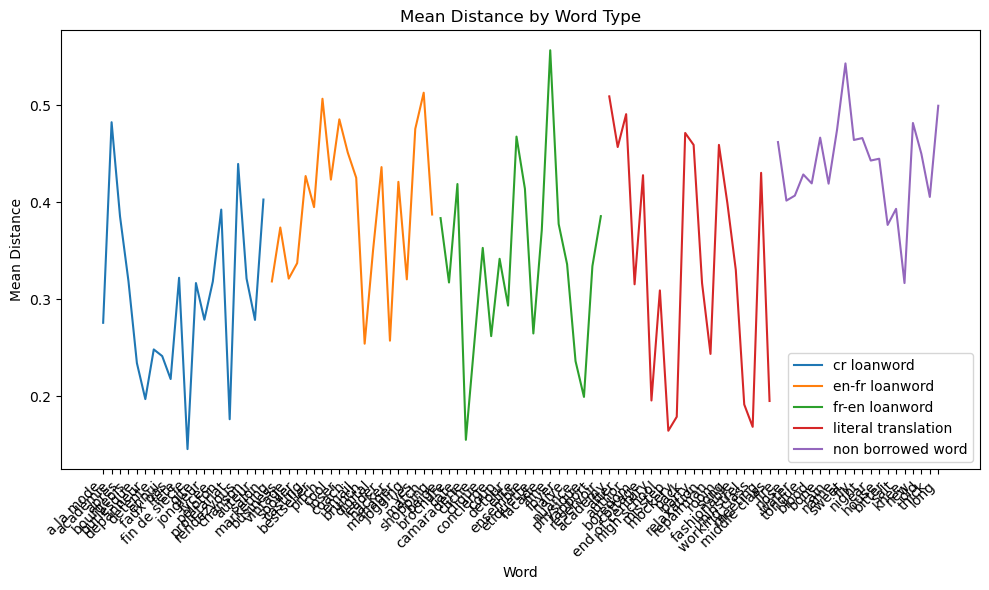

In [15]:
# Group by word type and create a line graph for each group
plt.figure(figsize=(10, 6))
for word_type, group_df in cluster_wtypes.groupby('word type'):
    plt.plot(group_df['word'], group_df['av'], label=word_type)

plt.title('Mean Distance by Word Type')
plt.xlabel('Word')
plt.ylabel('Mean Distance')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


